# Graph Generation
Different models with unique patterns and difficulty

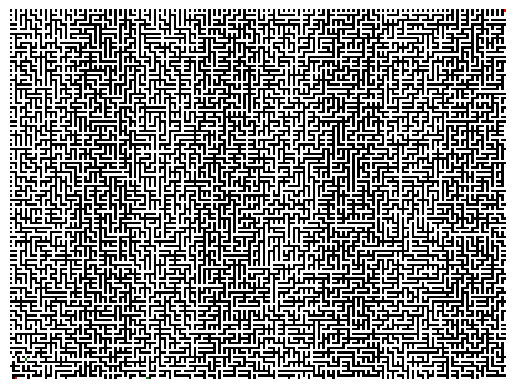

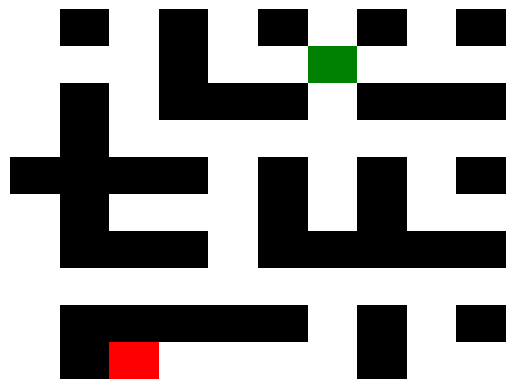

In [156]:

maze = [
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", "#", "#", "#", "#", "#", ".", ".", ".", "."],
    [".", "#", "#", ".", ".", ".", ".", ".", "#", ".", "."],
    [".", ".", "#", ".", ".", ".", ".", ".", "#", ".", "."],
    ["#", ".", "#", ".", ".", ".", ".", ".", "#", ".", "#"],
    [".", ".", "#", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", "#", "#", "#", "#", ".", ".", "#", ".", "#", "."],
    [".", "#", ".", ".", "F", "#", ".", "#", "#", "#", "."],
    [".", "#", ".", "#", "#", "#", "#", "#", ".", ".", "."],
    [".", "#", ".", "#", ".", ".", ".", ".", ".", "#", "."],
    [".", "#", ".", "#", "#", "#", "#", "#", ".", "#", "."],
    [".", "#", ".", ".", ".", "#", ".", ".", ".", ".", "."],
    [".", "#", "#", "#", ".", "#", ".", "#", "#", ".", "."],
    ["S", "#", ".", ".", ".", ".", ".", ".", ".", "#", "."]
]

import collections
import time
import random
import numpy
from termcolor import colored
import heapq
import matplotlib.pyplot as plt
from matplotlib import colors as c

import turtle
import math

class Pen(turtle.Turtle):
    def __init__(self, color, size):
        turtle.Turtle.__init__(self)
        self.shape("square")
        self.shapesize(size[0], size[1])
        self.color(color)
        self.penup()
        
class Player(turtle.Turtle):
    def __init__(self, color, size):
        turtle.Turtle.__init__(self)
        self.shape("circle")
        self.shapesize(size[0], size[1])
        self.color(color)
        self.penup()
        self.steps = 0
        self.finish = False
        
class Dot(turtle.Turtle):
    def __init__(self, x, y, color, size):
        turtle.Turtle.__init__(self)
        self.shape("circle")
        self.shapesize(size[0], size[1])
        self.color(color)
        self.penup()
        self.steps = 1
        self.goto(x, y)
    
    def destroy(self):
        self.hideturtle()
        
class Finish(turtle.Turtle):
    def __init__(self, x, y, color, size):
        turtle.Turtle.__init__(self)
        self.shape("circle")
        self.shapesize(size[0], size[1])
        self.color(color)
        self.penup()
        self.goto(x, y)
        
class Queue:
    def __init__(self):
        self.elements = collections.deque()
    
    def empty(self):
        return len(self.elements) == 0 #True or False
    
    def put(self, x):
        self.elements.append(x)
    
    def get(self):
        return self.elements.popleft()

class graph:
    def __init__(self, maze = [
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", "#", "#", "#", "#", "#", ".", ".", ".", "."],
    [".", "#", "#", ".", ".", ".", ".", ".", "#", ".", "."],
    [".", ".", "#", ".", ".", ".", ".", ".", "#", ".", "."],
    ["#", ".", "#", ".", ".", ".", ".", ".", "#", ".", "#"],
    [".", ".", "#", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", "#", "#", "#", "#", ".", ".", "#", ".", "#", "."],
    [".", "#", ".", ".", "F", "#", ".", "#", "#", "#", "."],
    [".", "#", ".", "#", "#", "#", "#", "#", ".", ".", "."],
    [".", "#", ".", "#", ".", ".", ".", ".", ".", "#", "."],
    [".", "#", ".", "#", "#", "#", "#", "#", ".", "#", "."],
    [".", "#", ".", ".", ".", "#", ".", ".", ".", ".", "."],
    [".", "#", "#", "#", ".", "#", ".", "#", "#", ".", "."],
    ["S", "#", ".", ".", ".", ".", ".", ".", ".", "#", "."]
]):
        self.height = len(maze)
        self.width = len(maze[0])
        self.stats = {}
        self.start = ()
        self.path = {} # make this record the succsesful path
        for y in range(self.height):
            for x in range(self.width):
                self.stats[x, y] = maze[y][x]
                if maze[y][x] == "S":
                    self.start = (x, y)
        
    def print_graph(self, player_x = "not", player_y = "not"):
        player_pos = ()
        for y in range(self.height):
            row = []
            for x in range(self.width):
                if player_x != "not" and player_x == x and player_y == y:
                    if x + 1 == self.width:
                        row.append(" |P|")
                        
                    else:
                        row.append("|P")
                else:
                    if x + 1 == self.width:
                        row.append("|" + self.stats[x, y] + "|")
                    else:
                        row.append("|" + self.stats[x, y])
            print(*row, sep='')
        print()
        
    def in_bounds(self, id):
        (x, y) = id
        return 0 <= x < self.width and 0 <= y < self.height
    
    def passable(self, id):
        return self.stats[id] != "#"
    
    def unknown(self, known, pos):
        k = []
        for i in range(len(pos)):
            if pos[i] not in known:
                k.append(pos[i])
        return k
    
    def neighbors(self, id):
        (x, y) = id
        results = [(x+1, y), (x, y-1), (x-1, y), (x, y+1)]
        if (x + y) % 2 == 0: 
            results.reverse()
        results = list(filter(self.in_bounds, results))
        results = list(filter(self.passable, results))
        return results
    
    def true_neighbors(self, id):
        (x, y) = id
        results = [(x+1, y), (x, y-1), (x-1, y), (x, y+1)]
        if (x + y) % 2 == 0: 
            results.reverse()
        results = list(filter(self.in_bounds, results))
        return results
    
    def diagonals(self, id):
        (x, y) = id
        results = [(x+1, y+1), (x-1, y-1), (x-1, y+1), (x+1, y-1)]
        if (x + y) % 2 == 0: 
            results.reverse()
            
        results = list(filter(self.in_bounds, results))
        results = list(filter(self.passable, results))
        
        return results
    
    def show(self):
        cMap = c.ListedColormap(['white','black','green', 'red']) 
        plt.pcolormesh(dictToArr(self.stats,self.width,self.height), cmap=cMap)
        plt.xticks([]) 
        plt.yticks([]) 
        plt.axis('off')
        plt.show()
        
    def save_image_to_file(self, filename):
        # fig, ax = plt.subplots()
        # fig.patch.set_visible(False)
        # ax.axis('off')
        # plt.rcParams['axes.linewidth'] = 0.1
        cMap = c.ListedColormap(['white','black','green', 'red']) 
        plt.pcolormesh(dictToArr(self.stats,self.width,self.height), cmap=cMap)
        plt.xticks([]) 
        plt.yticks([])
        plt.axis('off')
        plt.savefig(filename)
    
    def print_path(self, path):
        if path != None:
            for y in range(self.height):
                row = []
                for x in range(self.width):
                    if [x, y] in path or (x,y) in path:
                        if x + 1 == self.width:
                            row.append("|P|")
                        else:
                            row.append("|P")
                    else:
                        if x + 1 == self.width:
                            row.append("|" + self.stats[x, y] + "|")
                        else:
                            row.append("|" + self.stats[x, y])

                print(*row, sep='')
        print()
    
    
    def search_1(self, return_len = False):
        frontier = Queue()
        frontier.put(self.start)

        finish = ()
        self.path[self.start] = [[self.start]]

        while not frontier.empty():
            current = frontier.get()

            for next in self.neighbors(current):
                if next not in self.path:
                    self.path[next] = self.path[current] + [[current[0], current[1]]]
                    frontier.put(next)
                if self.stats[next] == "F":
                        finish = next
                        break
        
        if finish != ():
            if not return_len:
                return self.path[finish][2:]
            else:
                print(len(self.path[finish][2:]))
                return len(self.path[finish][2:])
        else:
            print("Impossible maze")
            self.print_graph()
            
    def buildPath(self, step, path_from):
        path = [step]
        while step in path_from:
            step = path_from[step]
            path.append(step)
        print(path)
        return path
    
    def findFinish(self):
        for y in range(self.height):
            for x in range(self.width):
                if self.stats[x, y] == "F":
                    return (x, y)
                
            
    def AStarSearch(self):
        finish_pos = self.findFinish()
        fringe = [(0, self.start)]
        heapq.heapify(fringe)
        path_from = {}
        cost = {self.start: 0}

        while len(fringe) > 0:
            new_cost, new_node = heapq.heappop(fringe)
            # print(self.start, new_node)
            if self.stats[new_node] == "F":
                path = self.buildPath(new_node, path_from)
                return path[1:len(path)-1]
                
            
            for neighbor in self.neighbors(new_node):
                new_cost = cost.get(new_node) + 1
                
                if neighbor not in cost or new_cost < cost[neighbor]:
                    path_from[neighbor] = new_node
                    rank = new_cost + abs(neighbor[1]-finish_pos[1]) + abs(neighbor[0]-finish_pos[0])
                    cost[neighbor] = new_cost
                    heapq.heappush(fringe, (rank, neighbor))
                    
        return None
                    
                
                
            
    def make_random_maze(self, w, h):
        l = ['.'] * w
        maze = [l] * h
        
        self.height = h
        self.width = w
        self.stats = {}
        for y in range(self.height):
            for x in range(self.width):
                self.stats[x, y] = maze[y][x]
        self.start = (random.randint(0, w), random.randint(0, h))
        self.stats[self.start] = "S"
        self.path = {}
        
        frontier = Queue()
        frontier.put(self.start)
        mapped = [(self.start)]
        current = self.start
        stack = [(self.start)]
    
        while len(mapped) < w*h:
            for next in self.unknown(mapped, list(self.diagonals(current))):
                mapped.append(next)
                if random.random() < 0.5:
                    self.stats[next] = "#"
                else:
                    self.stats[next] = "."
                    stack.append(next)
                    
            possible = list(self.neighbors(current))
            possible = self.unknown(mapped, possible)
            
            if possible != []:
                current = random.choice(possible)
                if random.random() < 0.1:
                    self.stats[next] = "#"
                    stack.append(next)
                else:
                    self.stats[current] = "."
                    mapped.append(current)
                    stack.append(next)
            else:
                current = stack.pop(0)
            
        self.stats[current] = "F"
        self.stats[(current[0], current[1] - 1)] = "."
        self.stats[self.start] = "S"
        
    def divide_maze(self, width, height):
        if width[1] - width[0] >= 3 and height[1] - height[0] >= 3:
            wall_x = random.randint(width[0] + 1, width[1] - 2)
            wall_y = random.randint(height[0] + 1, height[1] - 2)
            for i in range(height[0], height[1] + 1):
                self.stats[wall_x, i] = "#"
            for i in range(width[0], width[1] + 1):
                self.stats[i, wall_y] = "#"

            self.stats[wall_x, random.randint(height[0], wall_y-1)] = "." 
            self.stats[wall_x, random.randint(wall_y+1, height[1])] = "." 
            self.stats[random.randint(width[0], wall_x-1), wall_y] = "." 
            self.stats[random.randint(wall_x+1, width[1]), wall_y] = "." 
            
            self.divide_maze((width[0], wall_x - 1), (height[0], wall_y - 1))
            self.divide_maze((wall_x + 1, width[1]), (height[0], wall_y - 1))
            self.divide_maze((width[0], wall_x - 1), (wall_y + 1, height[1]))
            self.divide_maze((wall_x + 1, width[1]), (wall_y + 1, height[1]))
            
        elif width[1] - width[0] >= 3 and height[1] - height[0] >= 2:
            wall_x = random.randint(width[0] + 1, width[1] - 2)
            for i in range(height[0], height[1] + 1):
                self.stats[wall_x, i] = "#"
            self.stats[wall_x, random.randint(height[0], height[1])] = "." 
            
            self.divide_maze((width[0], wall_x - 1), (height[0], height[1]))
            self.divide_maze((wall_x + 1, width[1]), (height[0], height[1]))
            
            
        elif width[1] - width[0] >=2 and height[1] - height[0] >= 3:
            wall_y = random.randint(height[0] + 1, height[1] - 2)
            for i in range(width[0], width[1] + 1):
                self.stats[i, wall_y] = "#"
            self.stats[random.randint(width[0], width[1]), wall_y] = "." 
            
            self.divide_maze((width[0], width[1]), (wall_y + 1, height[1]))
            self.divide_maze((width[0], width[1]), (wall_y + 1, height[1]))

            
        
    def make_room_maze(self, w = 35, h = 35):
        l = ['.'] * w
        maze = [l] * h
        
        self.height = h
        self.width = w
        self.stats = {}
        for y in range(self.height):
            for x in range(self.width):
                self.stats[x, y] = maze[y][x]
                
        if random.random() >= 0.5:
            if random.random() >= 0.5:
                self.start = (0, random.randint(1, h - 2))
            else:
                self.start = (w - 1, random.randint(1, h - 2))
        else:
            if random.random() >= 0.5:
                self.start = (random.randint(1, w - 2), 0)
            else:
                self.start = (random.randint(1, w - 2), h - 1)
                
        self.stats[self.start] = "S"
        self.path = {}
        
        frontier = Queue()
        frontier.put(self.start)
        # mapped = [(self.start)]
        # current = self.start
        # stack = [(self.start)]
        
        self.divide_maze([0, w - 1], [0, h - 1])
        ok = False
        while not ok:
            (x, y) = (random.randint(0, w - 1), random.randint(0, h - 1))
            if self.stats[x, y] == ".":
                self.stats[x, y] = "F"
                self.stats[self.start] = "S"
                ok = True
                
    def cellular_automaton(self, w = 35, h = 35):
        self.height = h
        self.width = w
        self.stats = {}
        for y in range(self.height):
            for x in range(self.width):
                if random.random() > 0.4:
                    self.stats[x, y] = "."
                else:
                    self.stats[x, y] = "#"
        for i in range(5):
            next_gen_stats = {}
            #rules
            for y in range(self.height):
                for x in range(self.width):
                    neighbors = self.neighbors((x, y)) + self.diagonals((x, y))
                    if self.stats[x, y] == "#":
                        if len(neighbors) == 3: # 3
                            next_gen_stats[x, y] = "."
                        else:
                            next_gen_stats[x, y] = "#"
                    else:
                        if len(neighbors) >= 1 and len(neighbors) <= 5: # 1-5
                            next_gen_stats[x, y] = "."
                        else:
                            next_gen_stats[x, y] = "#"
                        
            self.stats = {k: v for k, v in next_gen_stats.items()}     
#             self.print_graph()
            
        self.start = (random.randint(0, w - 1), random.randint(0, h - 1))
        self.stats[self.start] = "S"
        self.stats[random.randint(0, w - 1), random.randint(0, h - 1)] = "F"
        
    def primitive(self, w = 35, h = 35):
        self.height = h
        self.width = w
        self.stats = {}
        for y in range(self.height):
            for x in range(self.width):
                self.stats[x, y] = "#"    
        
        self.start = (random.randint(0, w - 1), random.randint(0, h - 1))
       
        
        visited = [self.start]
        came_from = {}
        for next in self.true_neighbors(self.start):
            came_from[next] = self.start
        wall_list = self.true_neighbors(self.start)
        
        def check(id):
            return id not in visited
        s = 0
        while wall_list:
            s += 1
#             print(str(wall_list) + " wall list")
#             print(str(visited) + " visited")
            current = random.choice(wall_list)
            visited.append(current)
            wall_list.remove(current)
#             print(str(current) + " current")
            connects_to = tuple(numpy.subtract(current, tuple(numpy.subtract(came_from[current], current))))
#             print(str(connects_to) + " connects to")
            if connects_to not in visited:
                self.stats[current] = "."
                self.stats[connects_to] = "."
                visited.append(connects_to)
                wall_list = wall_list + list(filter(check, self.true_neighbors(connects_to)))
                for next in list(filter(check, self.true_neighbors(connects_to))):
                    came_from[next] = connects_to
            finish = connects_to
            # if s % 3 == 0 and s < 10:
            #     print("Generation Step Number: ", s)
            #     self.print_graph()
            # elif s % 100 == 0 and s < 500:
            #     print("Generation Step Number: ", s)
            #     self.print_graph()
        self.stats[self.start] = "S"
        self.stats[finish] = "F"
                
    def row_by_row(self, w = 35, h = 35):
        self.height = h
        self.width = w
        self.stats = {}
        passages = []
        for y in range(self.height):
            for x in range(self.width):
                if y == 0:
                    if random.random() > 0.5:
                        self.stats[x, y] = "."
                        passages.append((x, y))
                    else:
                        self.stats[x, y] = "#"
                else:
                    if (x, y) in passages:
                        self.stats[x, y] = "."
                    else:
                        self.stats[x, y] = "#"
                    
#             print(passages)
            new_passages = []
            for x in range(self.width):
                if (x, y) not in passages:
                    if random.random() > 0.5:
                        new_passages.append((x, y + 1))
#             print(new_passages)
            group = []
            for i in range(self.width):
                if self.stats[i, y] == ".":
                    group.append(passages[0])
                    passages.pop(0)
                    if i + 1 == self.width:
                        passages.append(group)
                else:
                    if len(group) >= 1:
                        passages.append(group)
                    group = []
                    
#             print(str(passages) + " passages")
            for i in range(len(passages)):
                num_of_down = random.randint(1, len(passages[i]))
                for d in range(num_of_down):
                    down = random.choice(passages[i])
                    new_passages.append((down[0], down[1] + 1))
                    passages[i].remove(down)
#             print(new_passages)
            new_passages.sort()
#             print(new_passages)
#             print("ok")
            passages = new_passages
#             print(passages)
        self.start = ()
        while self.start == ():
            self.start = (random.randint(0, w - 1), random.randint(0, h - 1))
            if self.stats[self.start] != ".":
                self.start = ()
        self.stats[self.start] = "S"
        self.stats[random.randint(0, w - 1), random.randint(0, h - 1)] = "F"
            
            
            
    def optimize_maze(self):
        
        frontier = Queue()
        frontier.put(self.start)

        finish = ()
        player_pos = ()
        came_from = {}
        path = {}
        came_from[self.start] = None
        path[self.start] = [[self.start]]

        while not frontier.empty():
            current = frontier.get()

            for next in self.neighbors(current):
                if next not in came_from:
                    path[next] = path[current] + [[current[0], current[1]]]
                    frontier.put(next)
                    came_from[next] = current
                    
        max_key = ""
        max_len = 0
        for key in path:
            cur_len = len(path[key])
            if cur_len > max_len:
                max_key = key
               
        # print(max_key)
        
        for pos, stat in self.stats.items():
            if stat == "F":
                x = pos

        self.stats[x] = "."
        self.stats[max_key[0], max_key[1]] = "F"
    
        

def printFile(arr, filename):
    file = open(filename,"w+")
    for row in arr:
        row = ""
        for spot in row:
            row += str(spot) + ","
                    
        # row = "".join(map(str, row))
        file.write(str(row) + "\n")  
    file.write("\n\n")
    
# def printFile(arr, filename):
#     with open('filename.txt', 'w') as f:
#         sys.stdout = f # Change the standard output to the file we created.
#         print('This message will be written to a file.')
#         sys.stdout = original_stdout # Reset the standard output to its original value
    
    
def print_to_file(filename, num = 1, graph_type = "make_room_maze", size = (35, 35), minimum_path_length = 0):
    file = open(filename,"w+")
    file.write(str(num) + " Maze Type: " + graph_type + ". Size: " + str(size) + ". Minimum Path Length: " + str(minimum_path_length) + ". \n\n")
        
    if num <= 0:
        raise Exception("ERROR no mazes will be generated. The number of mazes asked for must be positive.")
        
    new_maze = graph()
    for i in range(num):
        getattr(new_maze, graph_type)(size[0], size[1])
        # new_maze.primitive(size[0], size[1])
        new_maze.optimize_maze()
        path_length = len(new_maze.AStarSearch())
        if path_length >= minimum_path_length:
            file.write("Maze number " + str(i + 1) + "\nPath Length: " + str(path_length) + " \n")
            w = size[0]
            h = size[1]
            for y in range(0, h):
                row = []
                for x in range(0, w):
                    if x + 1 == w:
                        row.append("|" + new_maze.stats[x, y] + "|")
                    else:
                        row.append("|" + new_maze.stats[x, y])
                    
                row = "".join(map(str, row))
                file.write(str(row) + "\n")  
            file.write("\n\n")
        else:
            i-=1
        
        
        

def print_to_file_daily_mazes(filename, num = 1, graph_type = "make_room_maze", size = (35, 35), minimum = 0):
    file = open(filename,"w+")
        
    if num > 0:
        file.write("Daily Mazes:  \n\n")
        graphs = []
        path_length = {}
        while len(graphs) < num:
            i = len(graphs) + 1
            globals()["maze_" + str(i)] = graph(maze)
            getattr(globals()["maze_" + str(i)], graph_type)(size[0], size[1])
            globals()["maze_" + str(i)].optimize_maze()
            x = globals()["maze_" + str(i)].search_1(True)
            if x >= minimum:
                print(str(x) + " succsesful")
                globals()["maze_" + str(i)].print_graph()
                graphs.append(globals()["maze_" + str(i)])
                path_length[i] = x
            
        for i in range(num):
            print(str(len(path_length)) + " path")
            print(path_length)
            print(min(path_length))
            
            
            file.write("Graph number " + str(i + 1) + "\n\n")
            print(min(path_length, key=path_length.get))
            maze_to_print = graphs[min(path_length, key=path_length.get) - 1]
            path_length.pop(min(path_length, key=path_length.get))
                
            w = size[0]
            h = size[1]
            for y in range(0, h):
                row = []
                for x in range(0, w):
                    if x + 1 == w:
                        row.append("|" + maze_to_print.stats[x, y] + "|")
                    else:
                        row.append("|" + maze_to_print.stats[x, y])
                    
                row = "".join(map(str, row))
                file.write(str(row) + "\n")  
            file.write("\n\n")
            
            
            

class MazeLevel():
    def __init__(self, graph):
        self.graph = graph
        self.sprite_size = 1
        
        self.background_color = "black"
        self.wall_color = "white"
        self.dot_color = "brown"
        self.player_color = "green"
        self.finish_color = "red"
        
        self.window_width = 1500#24 * graph.width * self.sprite_size
        self.window_height = 800#24 * graph.height * self.sprite_size
        self.window = turtle.Screen()
        self.window.bgcolor(self.background_color)
        self.window.title("A Maze")
        self.window.setup(self.window_width + 100, self.window_height + 100)
        self.window.tracer(0)
        
        self.sprite_sizer = (self.window_height / graph.height / graph.height, self.window_width / graph.width / graph.width)
        
        if (self.sprite_sizer[0] > self.sprite_sizer[1]):
            self.dot_sizer = self.sprite_sizer[1]
            self.player_sizer = self.sprite_sizer[0]
        if (self.sprite_sizer[1] > self.sprite_sizer[0]):
            self.dot_sizer = self.sprite_sizer[0]
            self.player_sizer = self.sprite_sizer[1]
        
        self.pen = Pen(self.wall_color, self.sprite_sizer)
        self.player = Player(self.player_color, (self.player_sizer,self.player_sizer))
        
        self.graph = graph
        self.dots = []
        self.finish = []
        self.walls = []
        
    def setup_maze(self):
        if self.sprite_sizer[0] > self.sprite_sizer[1]:
            dot_sizer = self.sprite_sizer[1]
            player_sizer = self.sprite_sizer[0]
        if self.sprite_sizer[1] > self.sprite_sizer[0]:
            dot_sizer = self.sprite_sizer[0]
            player_sizer = self.sprite_sizer[1]
        for y in range(self.graph.height):
            for x in range(self.graph.width):
                character = self.graph.stats[x, y]
                screen_x = round(-((self.window_width - (self.window_width / self.graph.width)) / 2) + (x * self.sprite_size * (self.window_width / self.graph.width)))
                screen_y = round(((self.window_height - (self.window_height / self.graph.height)) / 2) - (y * self.sprite_size * (self.window_height / self.graph.height)))

                if character == "#":
                    self.pen.goto(screen_x, screen_y)
                    self.pen.stamp()

                    self.walls.append((screen_x, screen_y))

                if character == "S":
                    self.player.goto(screen_x, screen_y)

                if character == ".":
                    self.dots.append(Dot(screen_x, screen_y, self.dot_color, (self.dot_sizer, self.dot_sizer)))

                if character == "F":
                    self.finish.append(Finish(screen_x, screen_y, self.finish_color, self.sprite_sizer))

    def playLevel(self):
        self.setup_maze()
        print("Setup done")

        turtle.listen()
        turtle.onkey(self.left, "Left")
        turtle.onkey(self.right, "Right")
        turtle.onkey(self.up, "Up")
        turtle.onkey(self.down, "Down")

        while not self.player.finish:
            for dot in self.dots:
                if self.is_collision(dot):
                    self.player.steps += dot.steps
                    print("Steps: {}".format(self.player.steps))
                    dot.destroy()
                    self.dots.remove(dot)
            if self.is_collision(self.finish[0]):
                self.player.finish = True
                print("You Won")
                print("Total Steps: {}".format(self.player.steps))

            self.window.update()
        self.window.clear()
            
    def up(self):
        move_to_x = round(self.player.xcor())
        move_to_y = round(self.player.ycor() + (self.window_height / self.graph.height))
        
        if not self.wall_collision((move_to_x, move_to_y)) and move_to_y < (self.window_height) / 2:
            self.player.goto(move_to_x, move_to_y)
            
    def down(self):
        move_to_x = round(self.player.xcor())
        move_to_y = round(self.player.ycor() - (self.window_height / self.graph.height))
        
        if not self.wall_collision((move_to_x, move_to_y)) and move_to_y > -(self.window_height) / 2:
            self.player.goto(move_to_x, move_to_y)
            
            
    def left(self):
        move_to_x = round(self.player.xcor() - (self.window_width / self.graph.width))
        move_to_y = round(self.player.ycor())
        
        if not self.wall_collision((move_to_x, move_to_y)) and move_to_x > -(self.window_width) / 2:
            self.player.goto(move_to_x, move_to_y)
            
            
    def right(self):
        move_to_x = round(self.player.xcor() + (self.window_width / self.graph.width))
        move_to_y = round(self.player.ycor())

        if not self.wall_collision((move_to_x, move_to_y)) and move_to_x < (self.window_width) / 2:
            self.player.goto(move_to_x, move_to_y)
            
    def is_collision(self, other):
        a = self.player.xcor()-other.xcor()
        b = self.player.ycor()-other.ycor()
        distance = math.sqrt((a ** 2) + (b ** 2))
        
        if distance < 12:
            return True
        else:
            return False
        
    def wall_collision(self, spot):
        for wall in self.walls:
            a = wall[0] - spot[0]
            b = wall[1] - spot[1]
            distance = math.sqrt((a ** 2) + (b ** 2))

            if distance < 12:
                return True
        return False
    

    
class MazeGame():
    def __init__(self, graph):
        self.graph = graph
        self.sprite_size = 1
        
        self.background_color = "black"
        self.wall_color = "white"
        self.dot_color = "brown"
        self.player_color = "green"
        self.finish_color = "red"
        
        self.window_width = 1500#24 * graph.width * self.sprite_size
        self.window_height = 800#24 * graph.height * self.sprite_size
        self.window = turtle.Screen()
        self.window.bgcolor(self.background_color)
        self.window.title("A Maze")
        self.window.setup(self.window_width + 100, self.window_height + 100)
        self.window.tracer(0)
        
        self.sprite_sizer = (self.window_height / graph.height / graph.height, self.window_width / graph.width / graph.width)
        
        self.graph = graph
        self.dots = []
        self.finish = []
        self.walls = []
        
    def setup_maze(self):
        if self.sprite_sizer[0] > self.sprite_sizer[1]:
            dot_sizer = self.sprite_sizer[1]
            player_sizer = self.sprite_sizer[0]
            
            
def dictToArr(dict,w,h):
    arr = []
    for y in range(h):
        row = []
        for x in range(w):
            val = dict[x, y]
            if val == "#":
                row.append(1)
            elif val == "S":
                row.append(2)
            elif val == "F":
                row.append(3)
            else:
                row.append(0)
        arr.append(row)
    return arr
       
types_of_maze_generation = ['make_random_maze', 'divide_maze', 'make_room_maze', 'cellular_automaton', 'row_by_row', 'primitive']    
 
# g1 = graph(maze)
# w = 40
# h = 20
# g1.make_room_maze(w, h)
# g1.optimize_maze()
# print(g1.start)
# g1.print_graph()
# arr = dictToArr(g1.stats,w,h)
# game1 = MazeLevel(g1)
# game1.playLevel()

# Tell It What To Do

# print_to_file("demofile2.txt", 3, "row_by_row", (20, 20), 10)

# g1 = graph(maze)
# path = g1.search_1()
# g1.print_path(path)
# g1.primitive(20, 20)
# g1.print_graph()
# g1.optimize_maze()
# g1.print_graph()
# path = g1.search_1()
# g1.print_path(path)

# g2 = graph(maze)
# g2.row_by_row(15, 15)
# g2.optimize_maze()
# g2.print_graph()
# path = g2.search_1()
# g2.print_path(path)
# print_to_file("Room Game", 30, "make_room_maze", (4, 7))

w=10
h=8
for i in range(1,13):
    g = graph()
    g.primitive(i*w, h*i)
    g.optimize_maze()
    g.save_image_to_file("Prim Mazes/Prim " + str(i*w) + "x" + str(i*h) + " 1.png")
    
    
g3 = graph(maze)
g3.primitive(10, 10)
g3.optimize_maze()
g3.show()
g3.save_image_to_file("Prim Mazes/Prim 100x100 1.png")

# print("Final Maze")
# g3.print_graph()
# print()
# print("Optimized Solution Path")
# g3.optimize_maze()
# path = g3.AStarSearch()
# g3.print_path(path)


In [63]:
filenames = ["Room Style Mazes", "Primitive Mazes", "Random Mazes", "Cellular Automaton Mazes", "Row by Row Mazes"]
types_of_maze_generation = ["make_room_maze", "primitive", "make_room_maze", "cellular_automaton", "row_by_row"]    
number_of_mazes_per_file = 10
size = (40,60)
min_path_length = 40


for index, filename  in enumerate(filenames):
    print_to_file("Mazes/" + filename, number_of_mazes_per_file, types_of_maze_generation[index], size, min_path_length)


[(5, 11), (4, 11), (4, 10), (4, 9), (4, 8), (4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0), (1, 0), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (1, 29), (2, 29), (2, 28), (2, 27), (2, 26), (2, 25), (2, 24), (2, 23), (2, 22), (3, 22), (4, 22), (4, 21), (4, 20), (5, 20), (6, 20), (7, 20), (7, 21), (7, 22), (7, 23), (7, 24), (7, 25), (7, 26), (7, 27), (7, 28), (7, 29), (7, 30), (8, 30), (9, 30), (10, 30), (11, 30), (12, 30), (13, 30), (13, 29), (13, 28), (14, 28), (15, 28), (16, 28), (17, 28), (18, 28), (19, 28), (19, 29), (20, 29), (21, 29), (21, 28), (22, 28), (23, 28), (24, 28), (24, 27), (24, 26), (24, 25), (24, 24), (25, 24), (26, 24), (27, 24), (27, 23), (27, 22), (27, 21), (27, 20), (27, 19), (27, 18), (28, 18), (29, 18), (29, 17), (30, 1

In [73]:
for row in arr:
    print(row)

def printFile(arr, filename):
    with open(filename, 'w') as file:
        for row in arr:
            rowStr = ""
            for spot in row[:-1]:
                rowStr += str(spot) + ","
            rowStr += str(row[len(row)-1])
            file.write(rowStr) 
            print(rowStr) # for testing purposes 
        # file.write("\n\n")
    # file.close()

    
# printFile(arr, "RoombaMap.txt")

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle, choice

def generate_maze(width, height):
    maze = np.zeros((height, width), dtype=np.uint8)
    stack = [(0, 0)]

    while stack:
        x, y = stack[-1]
        maze[y, x] = 1
        neighbors = [(x + 2, y), (x - 2, y), (x, y + 2), (x, y - 2)]
        valid_neighbors = [n for n in neighbors if 0 <= n[0] < width and 0 <= n[1] < height and maze[n[1], n[0]] == 0]

        if valid_neighbors:
            nx, ny = choice(valid_neighbors)
            maze[ny, nx] = 1
            maze[(y + ny) // 2, (x + nx) // 2] = 1
            stack.append((nx, ny))
        else:
            stack.pop()

    return maze

maze = generate_maze(20, 20)

In [113]:
print(maze)
arr[0][0] = 2
print(arr)

import pandas as pd

data = {'letter': [0,1,2,3], 'color': ['#FF0000', '#FF7F00', '#FFD400', '#FFFF00']}
df = pd.DataFrame(data)

[[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0]
 [1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0]
 [1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0]
 [1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0]
 [1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0]
 [1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0]
 [1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0]
 [1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

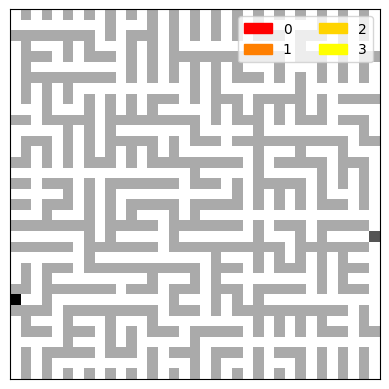

In [122]:
import matplotlib.patches as mpatches

plt.imshow(arr, cmap='binary', interpolation='nearest')

colorlist = zip(df['letter'], df['color'])
handles = [mpatches.Patch(color=colour, label=label) for label, colour in colorlist]
labels = df['letter']
plt.legend(handles, labels, ncol=2, bbox_to_anchor=(1, 1))
plt.xticks([]), plt.yticks([])
plt.show()

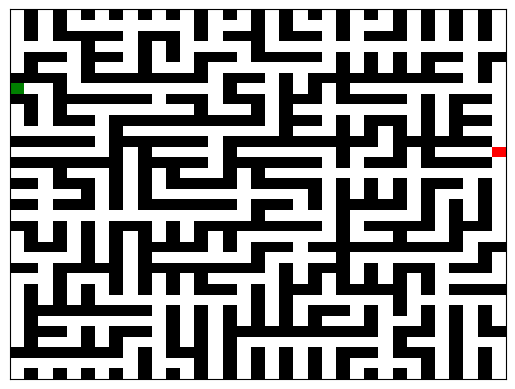

In [124]:
from matplotlib import colors as c

cMap = c.ListedColormap(['white','black','red', 'green'])


plt.pcolormesh(arr, cmap=cMap)
plt.xticks([]) # remove the tick marks by setting to an empty list
plt.yticks([]) # remove the tick marks by setting to an empty list
plt.show()